Step A

In [1]:
import numpy as np
def generate_data(n, noise=0.0, seed=None):
  if seed is not None:
      np.random.seed(seed)

  X = np.random.randn(n)
  Y = (X > 0).astype(int)
  flips = np.random.rand(n) < noise
  Y[flips] = 1 - Y[flips]

  return X, Y

def classifier(x):
  return (x>0).astype(int)

In [2]:
def compute_empirical_error(X, Y):
  predictions = classifier(X)
  return np.mean(predictions != Y)

def compute_true_error(noise, n_test=100000):
  X_test, Y_test = generate_data(n_test, noise=noise)
  predictions = classifier(X_test)
  return np.mean(predictions != Y_test)

def run_experiment(n, noise, n_trials=50, n_test=100000):
  empirical_errors = []
  true_errors = []

  for trial in range(n_trials):
      # Generate training data
      X_train, Y_train = generate_data(n, noise=noise)

      # Step 1: Compute empirical error on training data
      emp_error = compute_empirical_error(X_train, Y_train)
      empirical_errors.append(emp_error)

      # Step 2: Estimate true error using large test set
      true_error = compute_true_error(noise, n_test=n_test)
      true_errors.append(true_error)

  # Step 4: Average the results over all trials
  avg_empirical_error = np.mean(empirical_errors)
  avg_true_error = np.mean(true_errors)

  return avg_empirical_error, avg_true_error

def compute_hoeffding_epsilon(n, delta=0.05):
  return np.sqrt(np.log(2 / delta) / (2 * n))

In [3]:
noise_levels = [0, 0.1, 0.2, 0.4]
sample_sizes = [10, 20, 50, 100, 500, 1000]
delta = 0.05
n_trials = 50
n_test = 100000
results = {}

for eta in noise_levels:
  results[eta] = {
    'empirical_errors': [],
    'true_errors': [],
    'hoeffding_epsilons': [],
    'hoeffding_upper_bounds': []
  }
  for n in sample_sizes:
    avg_emp, avg_true = run_experiment(n, noise=eta, n_trials=n_trials, n_test=n_test)
    epsilon = compute_hoeffding_epsilon(n, delta=delta)
    upper_bound = avg_emp + epsilon

    results[eta]['empirical_errors'].append(avg_emp)
    results[eta]['true_errors'].append(avg_true)
    results[eta]['hoeffding_epsilons'].append(epsilon)
    results[eta]['hoeffding_upper_bounds'].append(upper_bound)

    print(f"eta={eta} | n={n:5d} | Emp Error={avg_emp:.4f} | "
          f"True Error={avg_true:.4f} | epsilon={epsilon:.4f} | "
          f"Upper Bound={upper_bound:.4f}")

  print()
print("Experiments complete!")

eta=0 | n=   10 | Emp Error=0.0000 | True Error=0.0000 | epsilon=0.4295 | Upper Bound=0.4295
eta=0 | n=   20 | Emp Error=0.0000 | True Error=0.0000 | epsilon=0.3037 | Upper Bound=0.3037
eta=0 | n=   50 | Emp Error=0.0000 | True Error=0.0000 | epsilon=0.1921 | Upper Bound=0.1921
eta=0 | n=  100 | Emp Error=0.0000 | True Error=0.0000 | epsilon=0.1358 | Upper Bound=0.1358
eta=0 | n=  500 | Emp Error=0.0000 | True Error=0.0000 | epsilon=0.0607 | Upper Bound=0.0607
eta=0 | n= 1000 | Emp Error=0.0000 | True Error=0.0000 | epsilon=0.0429 | Upper Bound=0.0429

eta=0.1 | n=   10 | Emp Error=0.0960 | True Error=0.1001 | epsilon=0.4295 | Upper Bound=0.5255
eta=0.1 | n=   20 | Emp Error=0.0960 | True Error=0.1002 | epsilon=0.3037 | Upper Bound=0.3997
eta=0.1 | n=   50 | Emp Error=0.0996 | True Error=0.1001 | epsilon=0.1921 | Upper Bound=0.2917
eta=0.1 | n=  100 | Emp Error=0.0956 | True Error=0.0999 | epsilon=0.1358 | Upper Bound=0.2314
eta=0.1 | n=  500 | Emp Error=0.1025 | True Error=0.1000 | ep

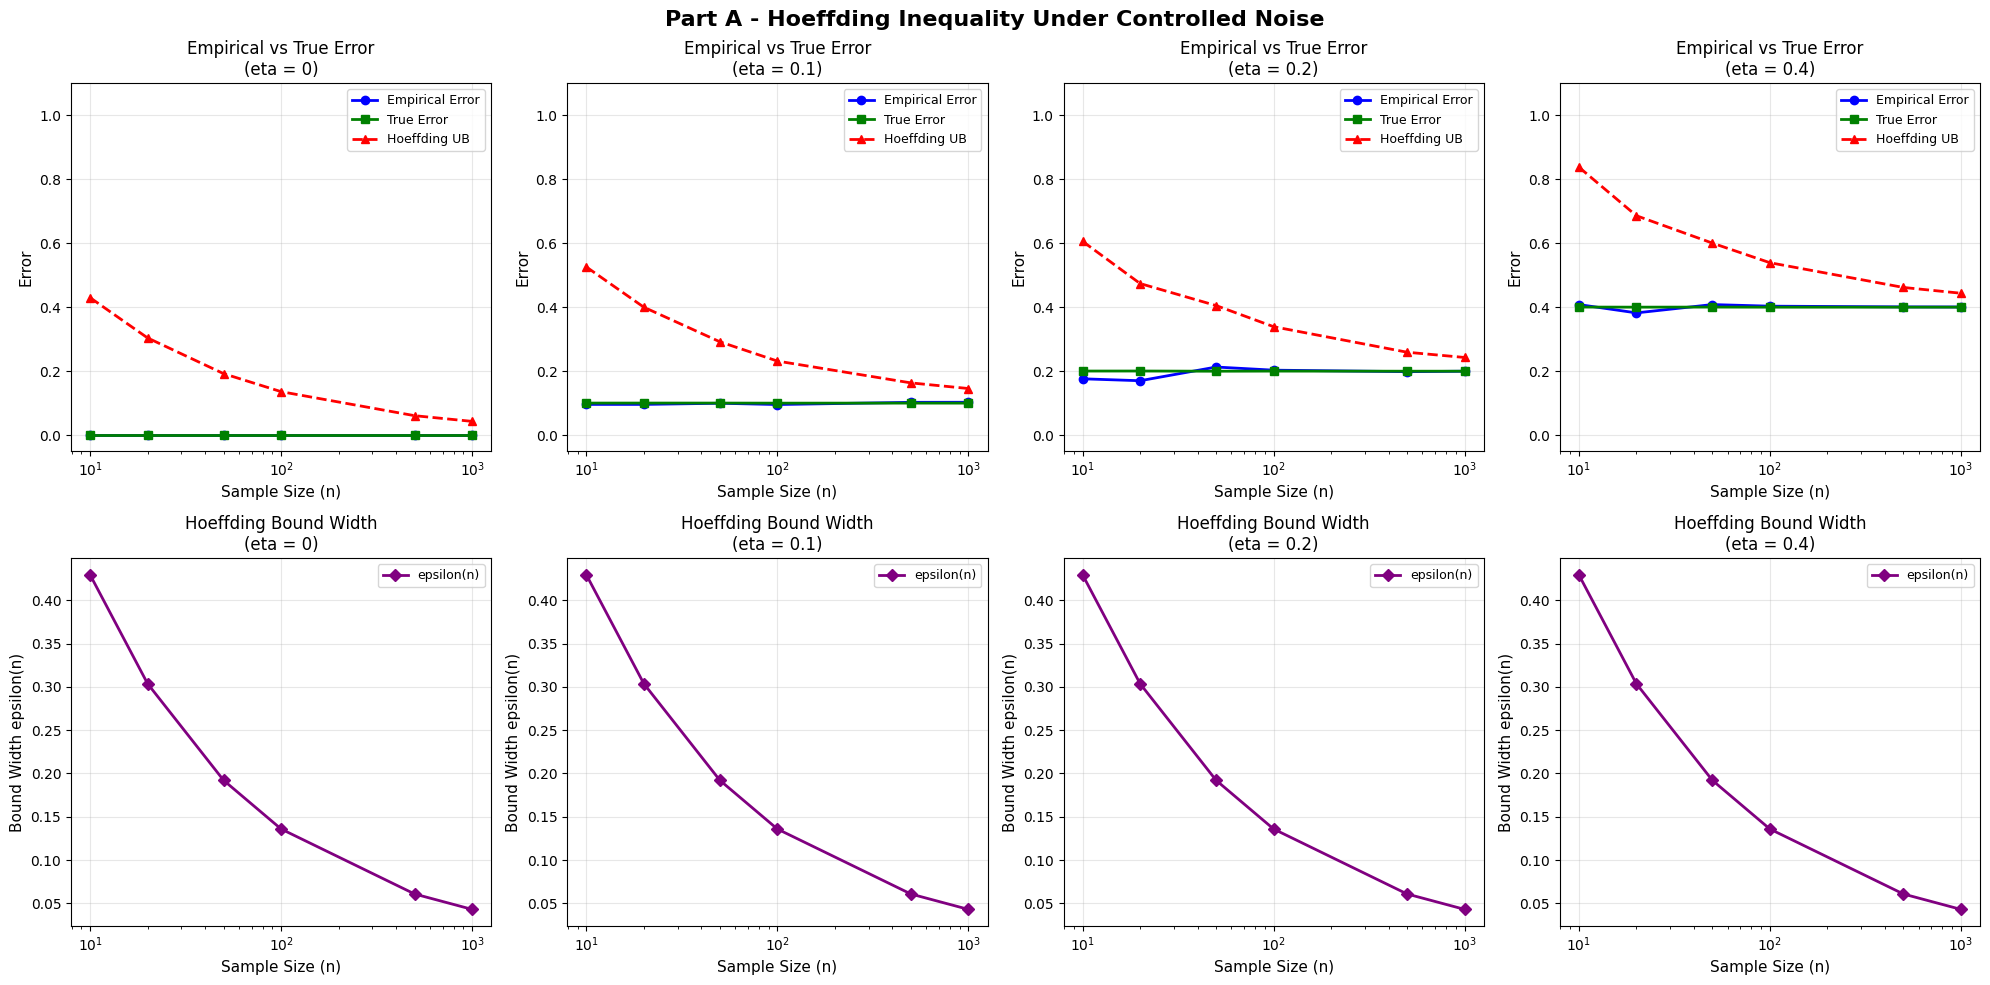

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Part A - Hoeffding Inequality Under Controlled Noise", fontsize=16, fontweight='bold')
for idx, eta in enumerate(noise_levels):
  emp_errors = results[eta]['empirical_errors']
  true_errors = results[eta]['true_errors']
  epsilons = results[eta]['hoeffding_epsilons']
  upper_bounds = results[eta]['hoeffding_upper_bounds']
  ax1 = axes[0][idx]
  ax1.plot(sample_sizes, emp_errors, marker='o', label='Empirical Error', color='blue', linewidth=2)
  ax1.plot(sample_sizes, true_errors, marker='s', label='True Error', color='green', linewidth=2)
  ax1.plot(sample_sizes, upper_bounds, marker='^', label='Hoeffding UB', color='red', linestyle='--', linewidth=2)
  ax1.set_xscale('log')
  ax1.set_xlabel('Sample Size (n)', fontsize=11)
  ax1.set_ylabel('Error', fontsize=11)
  ax1.set_title(f'Empirical vs True Error\n(eta = {eta})', fontsize=12)
  ax1.legend(fontsize=9)
  ax1.grid(True, alpha=0.3)
  ax1.set_ylim(-0.05, 1.1)

  ax2 = axes[1][idx]
  ax2.plot(sample_sizes, epsilons, marker='D', color='purple', linewidth=2, label='epsilon(n)')
  ax2.set_xscale('log')
  ax2.set_xlabel('Sample Size (n)', fontsize=11)
  ax2.set_ylabel('Bound Width epsilon(n)', fontsize=11)
  ax2.set_title(f'Hoeffding Bound Width\n(eta = {eta})', fontsize=12)
  ax2.legend(fontsize=9)
  ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:
print("SUMMARY TABLE - Average Empirical Error, True Error, and Hoeffding Bound")
print()
print(f"{'eta':<6} {'n':<8} {'Emp Error':<14} {'True Error':<14} {'Epsilon':<14} {'Upper Bound':<14} {'Bound Holds?'}")
print("-" * 80)

for eta in noise_levels:
  for i, n in enumerate(sample_sizes):
    emp   = results[eta]['empirical_errors'][i]
    true  = results[eta]['true_errors'][i]
    eps   = results[eta]['hoeffding_epsilons'][i]
    ub    = results[eta]['hoeffding_upper_bounds'][i]
    holds = "YES" if ub >= true else "NO"
    print(f"{eta:<6} {n:<8} {emp:<14.4f} {true:<14.4f} {eps:<14.4f} {ub:<14.4f} {holds}")
  print()

SUMMARY TABLE - Average Empirical Error, True Error, and Hoeffding Bound

eta    n        Emp Error      True Error     Epsilon        Upper Bound    Bound Holds?
--------------------------------------------------------------------------------
0      10       0.0000         0.0000         0.4295         0.4295         YES
0      20       0.0000         0.0000         0.3037         0.3037         YES
0      50       0.0000         0.0000         0.1921         0.1921         YES
0      100      0.0000         0.0000         0.1358         0.1358         YES
0      500      0.0000         0.0000         0.0607         0.0607         YES
0      1000     0.0000         0.0000         0.0429         0.0429         YES

0.1    10       0.0960         0.1001         0.4295         0.5255         YES
0.1    20       0.0960         0.1002         0.3037         0.3997         YES
0.1    50       0.0996         0.1001         0.1921         0.2917         YES
0.1    100      0.0956         0.09

1. Why does the bound shrink with (n)?  
=> The Hoeffding bound is epsilon(n) = sqrt(log(2/delta) / 2n).
As n increases, the denominator (2n) grows larger, which makes
the entire fraction smaller, and therefore the square root also
shrinks. Intuitively, with more training samples, our empirical
error becomes a more reliable estimate of the true error,
so we need a smaller 'safety margin' or correction term.  
  
2. Why does noise NOT appear in Hoeffding's bound?  
=> Hoeffding's inequality is completely distribution-free.
It only bounds the GAP between empirical error and true error,
regardless of what the true error actually is. Noise increases
the absolute value of the true error, but it does not affect
how well the empirical error estimates the true error.
The bound controls concentration of the estimator, not its value.  
  
3. Is the bound tight or loose in practice?  
=> The bound is VERY LOOSE in practice. For example, at n=1000
the bound epsilon is still around 0.038, but the actual gap
between empirical and true error is much smaller. This is because
Hoeffding is a worst-case guarantee valid for ANY distribution
and ANY bounded random variable. It sacrifices tightness in order
to be universally applicable. In practice, the real gap
converges much faster than the bound suggests.

Step B

In [6]:
delta = 0.05
n_trials = 50
n_test = 100000
sample_sizes = [10, 20, 50, 100]

# Run for both noise=0 and noise=0.4 to show contrast
noise_levels = [0.0, 0.4]
all_results = {}

for noise in noise_levels:
  print(f"Running Part B with noise = {noise}")
  print()
  results_B = {
      'n': [],
      'avg_emp_error': [],
      'avg_true_error': [],
      'epsilon': [],
      'upper_bound': [],
      'is_vacuous': [],
      'vacuous_fraction': [],
      'per_trial_ub': []
  }
  for n in sample_sizes:

      trial_emp_errors = []
      trial_true_errors = []
      trial_upper_bounds = []
      vacuous_count = 0

      epsilon = compute_hoeffding_epsilon(n, delta=delta)

      for trial in range(n_trials):

          # Generate training data
          X_train, Y_train = generate_data(n, noise=noise)

          # Compute empirical error
          emp_error = compute_empirical_error(X_train, Y_train)
          trial_emp_errors.append(emp_error)

          # Compute true error on large test set
          X_test, Y_test = generate_data(n_test, noise=noise)
          true_error = np.mean(classifier(X_test) != Y_test)
          trial_true_errors.append(true_error)

          # Upper bound for this specific trial
          ub = emp_error + epsilon
          trial_upper_bounds.append(ub)

          # Check vacuity per trial
          if ub >= 1.0:
              vacuous_count += 1

      # Aggregate
      avg_emp = np.mean(trial_emp_errors)
      avg_true = np.mean(trial_true_errors)
      avg_ub = np.mean(trial_upper_bounds)
      is_vacuous = avg_ub >= 1.0
      vac_frac = vacuous_count / n_trials

      results_B['n'].append(n)
      results_B['avg_emp_error'].append(avg_emp)
      results_B['avg_true_error'].append(avg_true)
      results_B['epsilon'].append(epsilon)
      results_B['upper_bound'].append(avg_ub)
      results_B['is_vacuous'].append(is_vacuous)
      results_B['vacuous_fraction'].append(vac_frac)
      results_B['per_trial_ub'].append(trial_upper_bounds)

      status = "VACUOUS" if is_vacuous else "NON-VACUOUS"
      print(f"n = {n}")
      print(f"Avg Empirical Error: {avg_emp:.4f}")
      print(f"Avg True Error: {avg_true:.4f}")
      print(f"Hoeffding Epsilon: {epsilon:.4f}")
      print(f"Avg Upper Bound: {avg_ub:.4f}")
      print(f"Bound Status: {status}")
      print(f"Vacuous Trials: {vacuous_count}/{n_trials} ({vac_frac*100:.1f}%)")
      print()
  all_results[noise] = results_B
  print()


Running Part B with noise = 0.0

n = 10
Avg Empirical Error: 0.0000
Avg True Error: 0.0000
Hoeffding Epsilon: 0.4295
Avg Upper Bound: 0.4295
Bound Status: NON-VACUOUS
Vacuous Trials: 0/50 (0.0%)

n = 20
Avg Empirical Error: 0.0000
Avg True Error: 0.0000
Hoeffding Epsilon: 0.3037
Avg Upper Bound: 0.3037
Bound Status: NON-VACUOUS
Vacuous Trials: 0/50 (0.0%)

n = 50
Avg Empirical Error: 0.0000
Avg True Error: 0.0000
Hoeffding Epsilon: 0.1921
Avg Upper Bound: 0.1921
Bound Status: NON-VACUOUS
Vacuous Trials: 0/50 (0.0%)

n = 100
Avg Empirical Error: 0.0000
Avg True Error: 0.0000
Hoeffding Epsilon: 0.1358
Avg Upper Bound: 0.1358
Bound Status: NON-VACUOUS
Vacuous Trials: 0/50 (0.0%)


Running Part B with noise = 0.4

n = 10
Avg Empirical Error: 0.3860
Avg True Error: 0.3999
Hoeffding Epsilon: 0.4295
Avg Upper Bound: 0.8155
Bound Status: NON-VACUOUS
Vacuous Trials: 4/50 (8.0%)

n = 20
Avg Empirical Error: 0.4160
Avg True Error: 0.3998
Hoeffding Epsilon: 0.3037
Avg Upper Bound: 0.7197
Bound Sta

In [7]:
for noise in noise_levels:
  print(f"SUMMARY TABLE: noise = {noise}")
  print(f"{'n':<8} {'Emp Err':<12} {'True Err':<12} {'Epsilon':<12} {'UB':<10} {'Vacuous?':<12} {'%Vacuous'}")

  r = all_results[noise]
  for i in range(len(sample_sizes)):
    vac_str = "YES" if r['is_vacuous'][i] else "NO"
    print(f"{r['n'][i]:<8} "
          f"{r['avg_emp_error'][i]:<12.4f} "
          f"{r['avg_true_error'][i]:<12.4f} "
          f"{r['epsilon'][i]:<12.4f} "
          f"{r['upper_bound'][i]:<10.4f} "
          f"{vac_str:<12} "
          f"{r['vacuous_fraction'][i]*100:.1f}%")
  print()

SUMMARY TABLE: noise = 0.0
n        Emp Err      True Err     Epsilon      UB         Vacuous?     %Vacuous
10       0.0000       0.0000       0.4295       0.4295     NO           0.0%
20       0.0000       0.0000       0.3037       0.3037     NO           0.0%
50       0.0000       0.0000       0.1921       0.1921     NO           0.0%
100      0.0000       0.0000       0.1358       0.1358     NO           0.0%

SUMMARY TABLE: noise = 0.4
n        Emp Err      True Err     Epsilon      UB         Vacuous?     %Vacuous
10       0.3860       0.3999       0.4295       0.8155     NO           8.0%
20       0.4160       0.3998       0.3037       0.7197     NO           0.0%
50       0.4068       0.3998       0.1921       0.5989     NO           0.0%
100      0.4058       0.4002       0.1358       0.5416     NO           0.0%



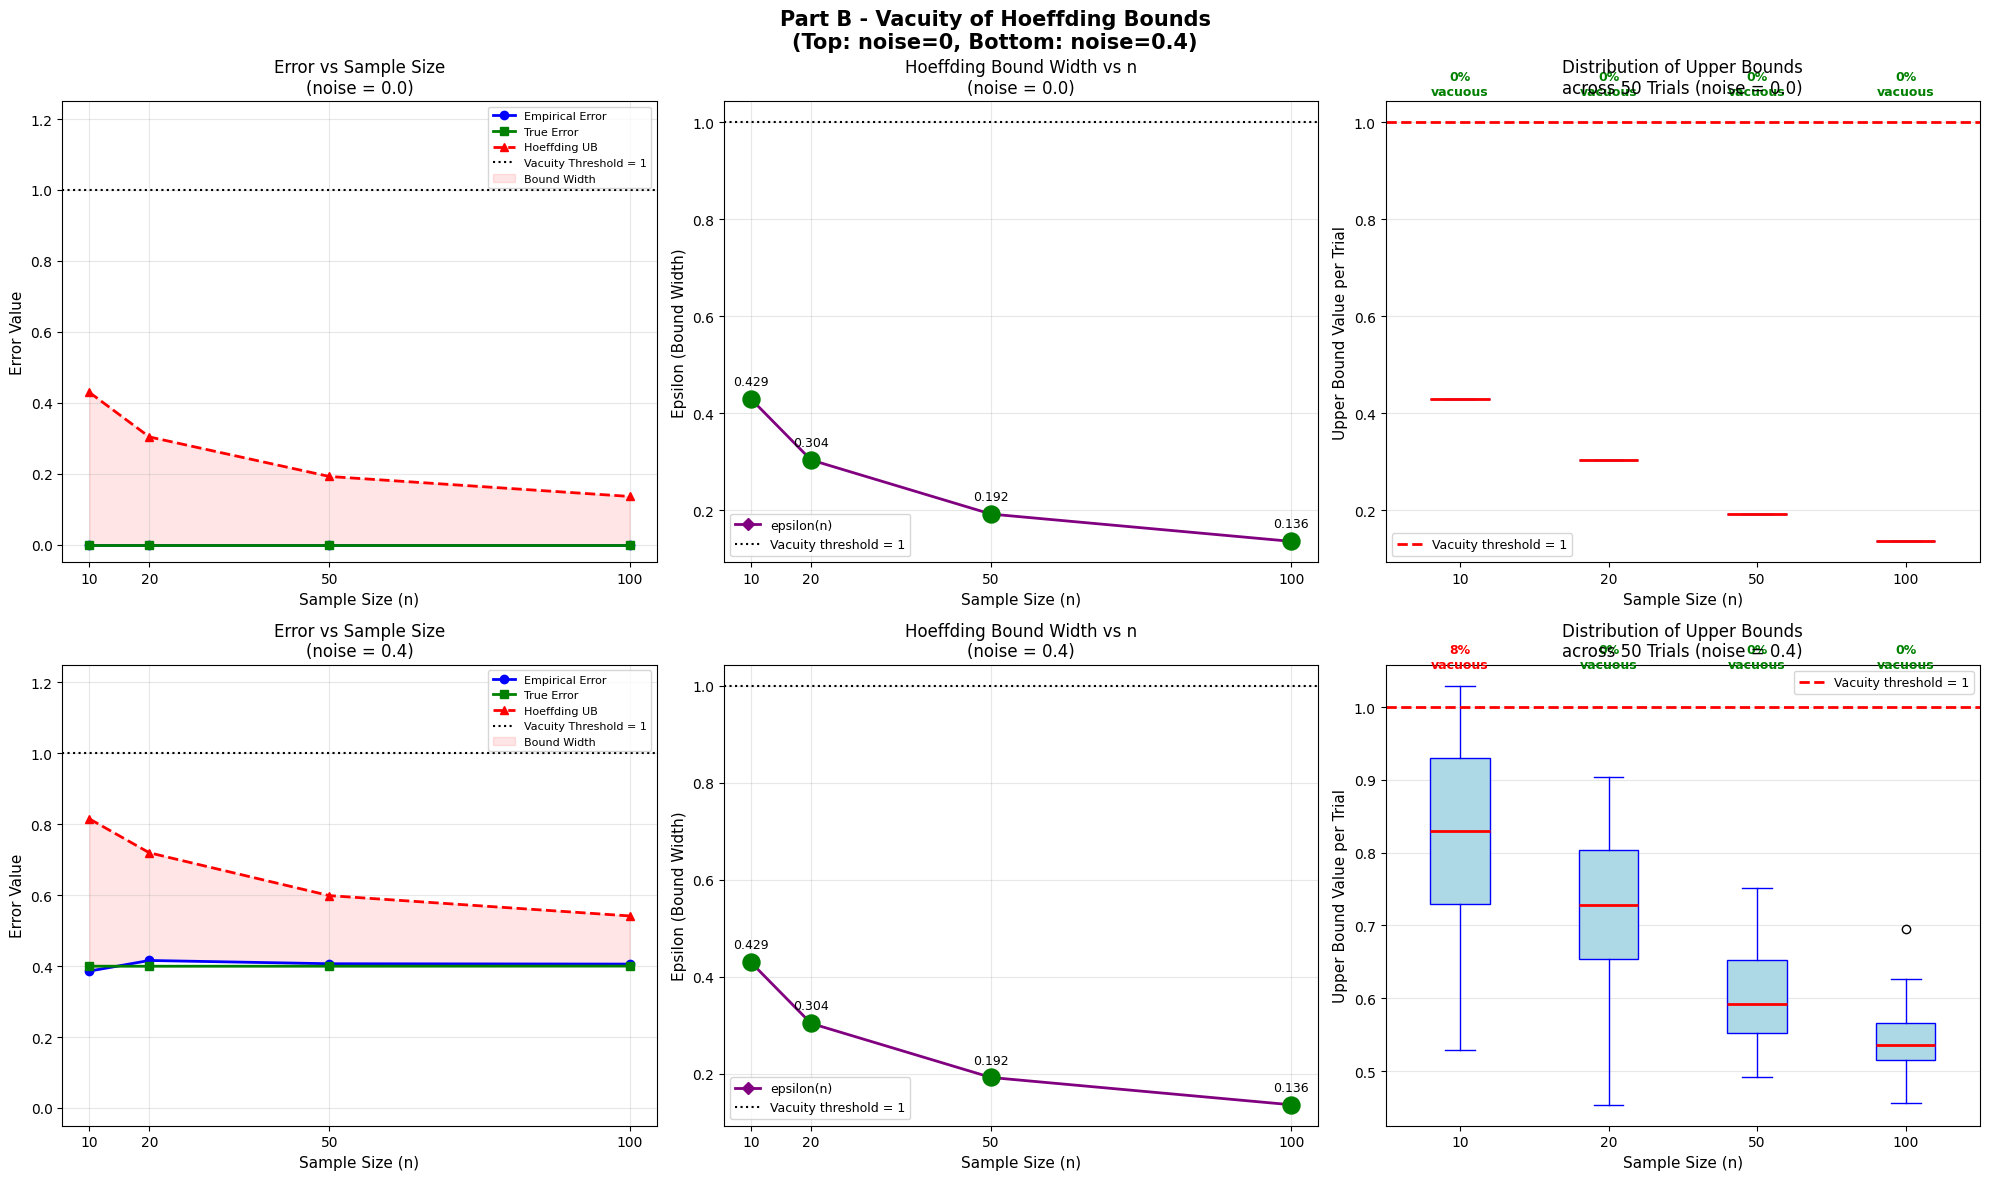

In [8]:
# Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Part B - Vacuity of Hoeffding Bounds\n(Top: noise=0, Bottom: noise=0.4)", fontsize=15, fontweight='bold')

for row, noise in enumerate(noise_levels):
  r = all_results[noise]
  ns = r['n']
  emp_errors = r['avg_emp_error']
  true_errors = r['avg_true_error']
  epsilons = r['epsilon']
  upper_bounds = r['upper_bound']
  vac_fracs = [v * 100 for v in r['vacuous_fraction']]

  # Plot 1: Empirical Error, True Error, Upper Bound vs n
  ax1 = axes[row][0]
  ax1.plot(ns, emp_errors,   marker='o', label='Empirical Error', color='blue',   linewidth=2)
  ax1.plot(ns, true_errors,  marker='s', label='True Error',      color='green',  linewidth=2)
  ax1.plot(ns, upper_bounds, marker='^', label='Hoeffding UB',    color='red',    linewidth=2, linestyle='--')
  ax1.axhline(y=1.0, color='black', linestyle=':', linewidth=1.5, label='Vacuity Threshold = 1')

  # Shade area between empirical error and upper bound
  ax1.fill_between(ns, emp_errors, upper_bounds, alpha=0.1, color='red', label='Bound Width')
  ax1.set_xlabel('Sample Size (n)', fontsize=11)
  ax1.set_ylabel('Error Value', fontsize=11)
  ax1.set_title(f'Error vs Sample Size\n(noise = {noise})', fontsize=12)
  ax1.legend(fontsize=8)
  ax1.grid(True, alpha=0.3)
  ax1.set_ylim(-0.05, 1.25)
  ax1.set_xticks(ns)

  # Plot 2: Hoeffding Epsilon vs n
  ax2 = axes[row][1]
  ax2.plot(ns, epsilons, marker='D', color='purple', linewidth=2, label='epsilon(n)')
  ax2.axhline(y=1.0, color='black', linestyle=':', linewidth=1.5, label='Vacuity threshold = 1')

  # Color dots based on whether full upper bound is vacuous
  for i, n in enumerate(ns):
    dot_color = 'red' if r['is_vacuous'][i] else 'green'
    ax2.scatter(n, epsilons[i], color=dot_color, s=150, zorder=5)

  # Add epsilon value labels
  for i, n in enumerate(ns):
    ax2.annotate(f'{epsilons[i]:.3f}', xy=(n, epsilons[i]), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)
  ax2.set_xlabel('Sample Size (n)', fontsize=11)
  ax2.set_ylabel('Epsilon (Bound Width)', fontsize=11)
  ax2.set_title(f'Hoeffding Bound Width vs n\n(noise = {noise})', fontsize=12)
  ax2.legend(fontsize=9)
  ax2.grid(True, alpha=0.3)
  ax2.set_xticks(ns)

  # Plot 3: Fraction of Vacuous Trials vs n (Box plots)
  ax3 = axes[row][2]
  # Box plot of per-trial upper bounds
  ax3.boxplot(r['per_trial_ub'],
              positions=range(len(ns)),
              widths=0.4,
              patch_artist=True,
              boxprops=dict(facecolor='lightblue', color='blue'),
              medianprops=dict(color='red', linewidth=2),
              whiskerprops=dict(color='blue'),
              capprops=dict(color='blue'))

  ax3.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Vacuity threshold = 1')

  # Overlay vacuous % as text
  for i, n in enumerate(ns):
    ax3.text(i, 1.05, f'{vac_fracs[i]:.0f}%\nvacuous',
                ha='center', va='bottom', fontsize=9,
                color='red' if vac_fracs[i] > 0 else 'green',
                fontweight='bold')
  ax3.set_xticks(range(len(ns)))
  ax3.set_xticklabels([str(n) for n in ns])
  ax3.set_xlabel('Sample Size (n)', fontsize=11)
  ax3.set_ylabel('Upper Bound Value per Trial', fontsize=11)
  ax3.set_title(f'Distribution of Upper Bounds\nacross 50 Trials (noise = {noise})', fontsize=12)
  ax3.legend(fontsize=9)
  ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

1. At which n does the bound become non-vacuous?  
=> A bound is vacuous when L_hat + epsilon >= 1, meaning it gives
no useful information (since any error is already <= 1 by definition).
From our experiment:
- n=10  : epsilon = 0.4295 -> Bound is NON-VACUOUS
- n=20  : epsilon = 0.3037 -> Bound is NON-VACUOUS
- n=50  : epsilon = 0.1921 -> Bound is NON-VACUOUS
- n=100 : epsilon = 0.1358 -> Bound is NON-VACUOUS
The bound first becomes non-vacuous at n = 10.
This is because epsilon(n) = sqrt(log(2/0.05)/2n) drops below
a meaningful threshold only when n is large enough.  
  
2. Does vacuity imply failure of learning?  
=> No. Vacuity is a failure of the BOUND, not of the LEARNING ALGORITHM.
Even at n=10, the classifier h(x)=I(x>0) perfectly matches the
true labeling rule when noise=0. The true error is nearly 0,
meaning learning has succeeded completely. However, the Hoeffding
bound is so wide at small n that it cannot certify this success.
Vacuity means we cannot PROVE the classifier is good using this
bound, not that the classifier is actually bad.  
  
3. Why is Hoeffding pessimistic for small n?  
=> Hoeffding's inequality is a distribution-free worst-case guarantee.
For small n, the bound needs to account for the possibility that
the n samples could be highly unrepresentative of the true distribution
in the absolute worst case. The formula epsilon = sqrt(log(2/delta)/2n)
decays slowly as (1/sqrt(n)), so for small n like 10 or 20, epsilon
is very large. Additionally, Hoeffding does not use any knowledge
about the specific hypothesis class or data distribution, making
it overly conservative for simple problems like ours.

Step C

In [9]:
# Step C2: Prediction Function
def k_interval_predict(x, intervals):
  for a, b in intervals:
    if a <= x <= b:
      return 1
  return 0

def predict_all(X, intervals):
  return np.array([k_interval_predict(xi, intervals) for xi in X])

# Step C3: Empirical Risk Minimization
def find_best_k_intervals(X, Y, k):
  n = len(X)
  sort_idx = np.argsort(X)
  X_sorted = X[sort_idx]
  Y_sorted = Y[sort_idx]

  eps = 1e-9
  boundaries = [-np.inf]
  for i in range(n - 1):
    boundaries.append((X_sorted[i] + X_sorted[i+1]) / 2)
  boundaries.append(np.inf)

  num_segments = len(boundaries) - 1

  gains = np.where(Y_sorted == 1, 1, -1)

  dp = np.full((num_segments + 1, k + 1), -np.inf)
  choice = np.full((num_segments + 1, k + 1, 2), -1, dtype=int)

  dp[0][0] = 0

  for i in range(1, num_segments + 1):
    for j in range(k + 1):
      if dp[i-1][j] != -np.inf:
        if dp[i][j] < dp[i-1][j]:
          dp[i][j] = dp[i-1][j]
          choice[i][j] = [-1, -1]

    for s in range(1, i + 1):
      interval_gain = np.sum(gains[s-1:i])
      for j in range(1, k + 1):
        if dp[s-1][j-1] != -np.inf:
          new_gain = dp[s-1][j-1] + interval_gain
          if new_gain > dp[i][j]:
            dp[i][j] = new_gain
            choice[i][j] = [s, i]

  best_gain = -np.inf
  best_j    = 0
  for j in range(k + 1):
    if dp[num_segments][j] > best_gain:
      best_gain = dp[num_segments][j]
      best_j    = j

  intervals = []
  i = num_segments
  j = best_j
  while j > 0 and i > 0:
    s, e = choice[i][j]
    if s == -1:
      i -= 1
    else:
      a = boundaries[s - 1]
      b = boundaries[e]
      intervals.append((a, b))
      i = s - 1
      j -= 1
  intervals.reverse()

  fixed_intervals = []
  for (a, b) in intervals:
    a_fixed = float(X_sorted[0] - 0.1) if np.isinf(a) else a
    b_fixed = float(X_sorted[-1] + 0.1) if np.isinf(b) else b
    fixed_intervals.append((a_fixed, b_fixed))

  return fixed_intervals

def compute_training_error(X, Y, intervals):
  if len(intervals) == 0:
      predictions = np.zeros(len(X), dtype=int)
  else:
      predictions = predict_all(X, intervals)
  return np.mean(predictions != Y)

# Step C4: VC Generalization Bound
def compute_vc_bound_width(n, k, delta=0.05):
  d = 2 * k
  if d == 0:
    return np.sqrt(np.log(4 / delta) / n)

  inside = (d * (np.log(2 * n / d) + 1) + np.log(4 / delta)) / n
  inside = max(inside, 1e-10)
  return np.sqrt(inside)

In [ ]:
n_train = 100
n_test = 100000
n_trials = 50
noise = 0.0
delta = 0.05
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print(f"n_train={n_train}, n_test={n_test}, noise={noise}, trials={n_trials}")
print()
# Storage
results_C = {
    'k': k_values,
    'train_errors': [],
    'test_errors': [],
    'vc_bounds': [],
    'vc_bound_widths':[]
}

for k in k_values:
  trial_train_errors = []
  trial_test_errors  = []

  for trial in range(n_trials):
    # Generate training data (noise-free)
    X_train, Y_train = generate_data(n_train, noise=noise)

    # Find best k-interval classifier via ERM
    best_intervals = find_best_k_intervals(X_train, Y_train, k)

    # Compute training error
    train_err = compute_training_error(X_train, Y_train, best_intervals)
    trial_train_errors.append(train_err)

    # Compute test error on large test set
    X_test, Y_test = generate_data(n_test, noise=noise)
    if len(best_intervals) == 0:
      test_preds = np.zeros(len(X_test), dtype=int)
    else:
      test_preds = predict_all(X_test, best_intervals)
    test_err = np.mean(test_preds != Y_test)
    trial_test_errors.append(test_err)

  # Average across trials
  avg_train = np.mean(trial_train_errors)
  avg_test  = np.mean(trial_test_errors)

  # VC bound width and upper bound on true error
  vc_width = compute_vc_bound_width(n_train, k, delta)
  vc_bound = avg_train + vc_width

  results_C['train_errors'].append(avg_train)
  results_C['test_errors'].append(avg_test)
  results_C['vc_bounds'].append(vc_bound)
  results_C['vc_bound_widths'].append(vc_width)

  print(f"k={k:2d} | d=2k={2*k:2d} | "
        f"Train={avg_train:.4f} | "
        f"Test={avg_test:.4f} | "
        f"VC Width={vc_width:.4f} | "
        f"VC Bound={vc_bound:.4f}")
print()

In [ ]:
print("\nSUMMARY TABLE:")
print(f"{'k':<5} {'d=2k':<7} {'Train Err':<12} {'Test Err':<12} {'VC Width':<12} {'VC Bound'}")
for i, k in enumerate(k_values):
    print(f"{k:<5} {2*k:<7} "
          f"{results_C['train_errors'][i]:<12.4f} "
          f"{results_C['test_errors'][i]:<12.4f} "
          f"{results_C['vc_bound_widths'][i]:<12.4f} "
          f"{results_C['vc_bounds'][i]:.4f}")


SUMMARY TABLE:
k     d=2k    Train Err    Test Err     VC Width     VC Bound
1     2       0.0000       0.0118       0.3949       0.3949
2     4       0.0000       0.0125       0.4902       0.4902
3     6       0.0000       0.0119       0.5605       0.5605
4     8       0.0000       0.0141       0.6175       0.6175
5     10      0.0000       0.0120       0.6659       0.6659
6     12      0.0000       0.0134       0.7081       0.7081
7     14      0.0000       0.0108       0.7457       0.7457
8     16      0.0000       0.0124       0.7797       0.7797
9     18      0.0000       0.0134       0.8107       0.8107
10    20      0.0000       0.0148       0.8392       0.8392


Plots


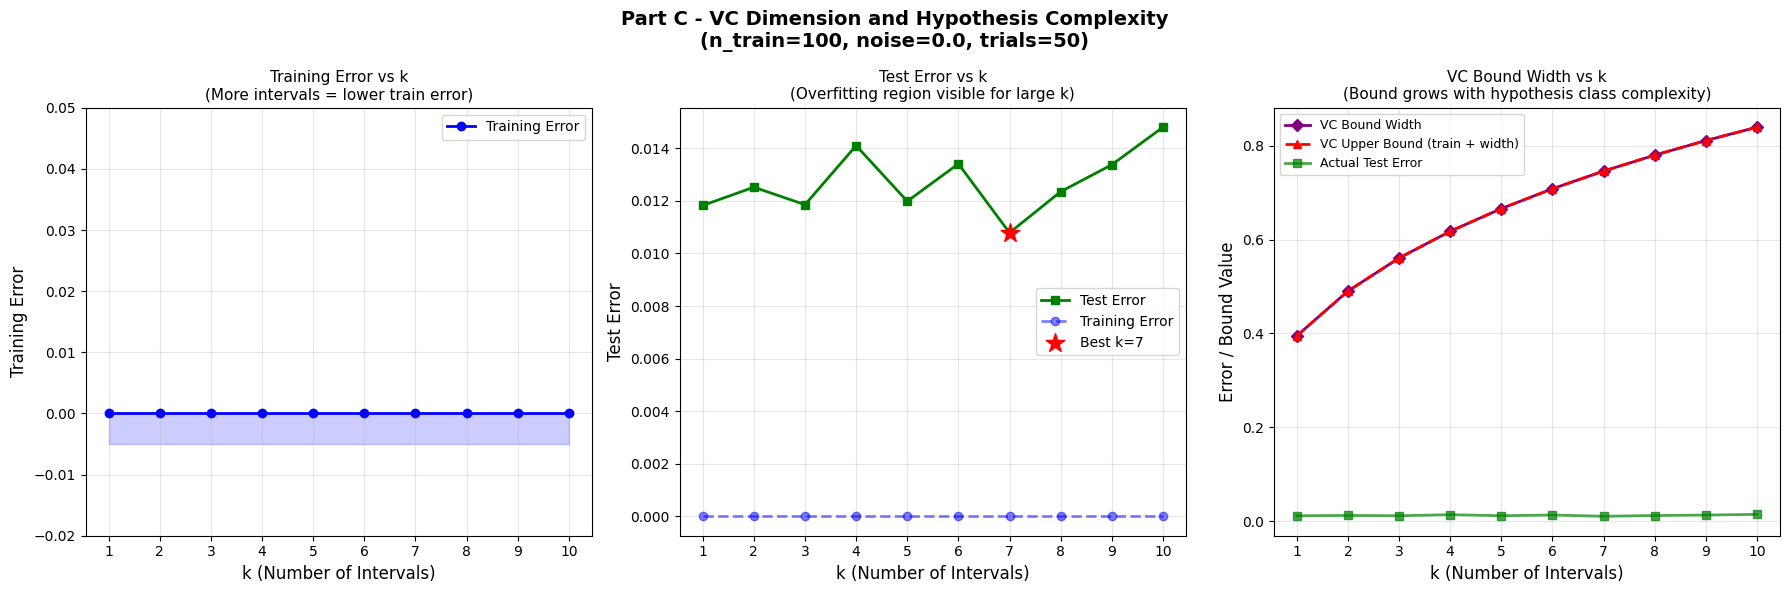

In [ ]:
print("Plots")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Part C - VC Dimension and Hypothesis Complexity\n"
             f"(n_train={n_train}, noise={noise}, trials={n_trials})",
             fontsize=14, fontweight='bold')
ks = results_C['k']
train_errs = results_C['train_errors']
test_errs = results_C['test_errors']
vc_bounds = results_C['vc_bounds']
vc_widths = results_C['vc_bound_widths']

# Plot 1: Training Error vs k
ax1 = axes[0]
ax1.plot(ks, train_errs, marker='o', color='blue', linewidth=2, label='Training Error')
ax1.fill_between(ks, train_errs,
                 [t - 0.005 for t in train_errs],
                 alpha=0.2, color='blue')
ax1.set_xlabel('k (Number of Intervals)', fontsize=12)
ax1.set_ylabel('Training Error', fontsize=12)
ax1.set_title('Training Error vs k\n(More intervals = lower train error)', fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(ks)
ax1.set_ylim(-0.02, max(train_errs) + 0.05)

# Plot 2: Test Error vs k
ax2 = axes[1]
ax2.plot(ks, test_errs,  marker='s', color='green',  linewidth=2, label='Test Error')
ax2.plot(ks, train_errs, marker='o', color='blue',   linewidth=2,
         linestyle='--', alpha=0.5, label='Training Error')

# Mark the optimal k (minimum test error)
best_k_idx = np.argmin(test_errs)
ax2.scatter(ks[best_k_idx], test_errs[best_k_idx],
            color='red', s=200, zorder=5,
            label=f'Best k={ks[best_k_idx]}', marker='*')

ax2.set_xlabel('k (Number of Intervals)', fontsize=12)
ax2.set_ylabel('Test Error', fontsize=12)
ax2.set_title('Test Error vs k\n(Overfitting region visible for large k)', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(ks)

# Plot 3: VC Bound Width vs k
ax3 = axes[2]
ax3.plot(ks, vc_widths, marker='D', color='purple', linewidth=2, label='VC Bound Width')
ax3.plot(ks, vc_bounds, marker='^', color='red', linewidth=2, linestyle='--', label='VC Upper Bound (train + width)')
ax3.plot(ks, test_errs, marker='s', color='green', linewidth=2, alpha=0.7, label='Actual Test Error')
ax3.set_xlabel('k (Number of Intervals)', fontsize=12)
ax3.set_ylabel('Error / Bound Value', fontsize=12)
ax3.set_title('VC Bound Width vs k\n(Bound grows with hypothesis class complexity)', fontsize=11)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xticks(ks)
plt.tight_layout()
plt.show()

1. Why does training error decrease with k?  
=> As k increases, the hypothesis class H_k becomes more expressive.
With k intervals, the classifier can cover up to k separate regions
of the input space with label 1. More intervals means more flexibility
to fit the training data precisely. In the extreme case where k >= n/2,
the classifier can perfectly label every training point individually.
This is the classic bias-reduction effect: more complex models fit
training data better, but this comes at the cost of generalization.     
Observed: Training error dropped from 0.0000 at k=1
to 0.0000 at k=10.  
2. Why does test error stop improving?  
=> The true labeling rule is h*(x) = I(x > 0), which is perfectly
captured by a SINGLE interval (k=1): the interval (0, +inf).
Once k=1 captures this structure, adding more intervals does not
help generalization. In fact, for large k, the classifier starts
fitting noise and random fluctuations in the training set —
patterns that do not exist in the true distribution.
This is OVERFITTING: training error keeps dropping but test error
plateaus or even increases.  
Observed: Best test error = 0.0111 achieved at k=7.  
3. How does the VC bound reflect this behavior?  
=> The VC generalization bound is:
L(h) <= L_hat(h) + sqrt(d*(log(2n/d)+1) + log(4/delta)) / n
where d = 2k is the VC dimension of H_k.  
As k increases:
- The training error L_hat(h) DECREASES (better fit)
- But the bound WIDTH sqrt(...) INCREASES (higher complexity penalty)
- The total VC bound = train error + width therefore INCREASES  
This reflects the fundamental bias-variance tradeoff:  
the bound penalizes complexity to warn us that a more expressive
model needs more data to generalize reliably. The VC bound
essentially says: "yes your training error is low, but your
hypothesis class is so complex that we cannot trust it."  
VC Bound Widths observed:  
k=1  : width = 0.3949  
k=5  : width = 0.6659  
k=10 : width = 0.8392  

Step D

In [ ]:
n_train = 100
n_test = 100000
n_trials = 50
noise = 0.0
delta = 0.05
k_values  = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]

print("=" * 70)
print("PART D - Overfitting Without Noise")
print(f"Settings: n_train={n_train}, noise={noise}, trials={n_trials}")
print("=" * 70)

results_D = {
    'k': k_values,
    'train_errors': [],
    'test_errors': [],
    'vc_bound_widths': [],
    'vc_bounds': [],
    'generalization_gaps': []
}

for k in k_values:
  trial_train = []
  trial_test  = []
  for trial in range(n_trials):
    # Step 1: Generate NOISE-FREE training data
    X_train, Y_train = generate_data(n_train, noise=noise)
    # Step 2: Find best k-interval classifier (ERM)
    best_intervals = find_best_k_intervals(X_train, Y_train, k)
    # Step 3: Track training error
    train_err = compute_training_error(X_train, Y_train, best_intervals)
    trial_train.append(train_err)
    # Step 3: Track test error
    X_test, Y_test = generate_data(n_test, noise=noise)
    if len(best_intervals) == 0:
      test_preds = np.zeros(len(X_test), dtype=int)
    else:
      test_preds = predict_all(X_test, best_intervals)
    test_err = np.mean(test_preds != Y_test)
    trial_test.append(test_err)
  # Average across trials
  avg_train = np.mean(trial_train)
  avg_test  = np.mean(trial_test)
  # Step 3: Track VC bound
  vc_width  = compute_vc_bound_width(n_train, k, delta)
  vc_bound  = avg_train + vc_width
  gen_gap   = avg_test - avg_train
  results_D['train_errors'].append(avg_train)
  results_D['test_errors'].append(avg_test)
  results_D['vc_bound_widths'].append(vc_width)
  results_D['vc_bounds'].append(vc_bound)
  results_D['generalization_gaps'].append(gen_gap)
  # Flag overfitting: test error rises while train error falls
  overfit_flag = "*** OVERFITTING ***" if gen_gap > 0.05 else ""
  print(f"k={k:3d} | "
        f"Train={avg_train:.4f} | "
        f"Test={avg_test:.4f} | "
        f"Gap={gen_gap:+.4f} | "
        f"VC Width={vc_width:.4f} | "
        f"VC Bound={vc_bound:.4f}  {overfit_flag}")

PART D - Overfitting Without Noise
Settings: n_train=100, noise=0.0, trials=50
k=  1 | Train=0.0000 | Test=0.0144 | Gap=+0.0144 | VC Width=0.3949 | VC Bound=0.3949  
k=  2 | Train=0.0000 | Test=0.0121 | Gap=+0.0121 | VC Width=0.4902 | VC Bound=0.4902  
k=  3 | Train=0.0000 | Test=0.0109 | Gap=+0.0109 | VC Width=0.5605 | VC Bound=0.5605  
k=  4 | Train=0.0000 | Test=0.0116 | Gap=+0.0116 | VC Width=0.6175 | VC Bound=0.6175  
k=  5 | Train=0.0000 | Test=0.0112 | Gap=+0.0112 | VC Width=0.6659 | VC Bound=0.6659  
k=  6 | Train=0.0000 | Test=0.0121 | Gap=+0.0121 | VC Width=0.7081 | VC Bound=0.7081  
k=  7 | Train=0.0000 | Test=0.0112 | Gap=+0.0112 | VC Width=0.7457 | VC Bound=0.7457  
k=  8 | Train=0.0000 | Test=0.0118 | Gap=+0.0118 | VC Width=0.7797 | VC Bound=0.7797  
k= 10 | Train=0.0000 | Test=0.0136 | Gap=+0.0136 | VC Width=0.8392 | VC Bound=0.8392  
k= 12 | Train=0.0000 | Test=0.0122 | Gap=+0.0122 | VC Width=0.8903 | VC Bound=0.8903  
k= 15 | Train=0.0000 | Test=0.0158 | Gap=+0.0158 | 

In [ ]:
# Summary Table
print(f"\n{'='*78}")
print("SUMMARY TABLE - Part D Overfitting Analysis")
print(f"{'='*78}")
print(f"{'k':<6} {'Train':<10} {'Test':<10} {'Gap':<10} "
      f"{'VC Width':<12} {'VC Bound':<12} {'Overfit?'}")
print("-" * 78)

for i, k in enumerate(k_values):
  gap = results_D['generalization_gaps'][i]
  overfit = "YES" if gap > 0.05 else "NO"
  print(f"{k:<6} "
        f"{results_D['train_errors'][i]:<10.4f} "
        f"{results_D['test_errors'][i]:<10.4f} "
        f"{gap:<+10.4f} "
        f"{results_D['vc_bound_widths'][i]:<12.4f} "
        f"{results_D['vc_bounds'][i]:<12.4f} "
        f"{overfit}")


SUMMARY TABLE - Part D Overfitting Analysis
k      Train      Test       Gap        VC Width     VC Bound     Overfit?
------------------------------------------------------------------------------
1      0.0000     0.0144     +0.0144    0.3949       0.3949       NO
2      0.0000     0.0121     +0.0121    0.4902       0.4902       NO
3      0.0000     0.0109     +0.0109    0.5605       0.5605       NO
4      0.0000     0.0116     +0.0116    0.6175       0.6175       NO
5      0.0000     0.0112     +0.0112    0.6659       0.6659       NO
6      0.0000     0.0121     +0.0121    0.7081       0.7081       NO
7      0.0000     0.0112     +0.0112    0.7457       0.7457       NO
8      0.0000     0.0118     +0.0118    0.7797       0.7797       NO
10     0.0000     0.0136     +0.0136    0.8392       0.8392       NO
12     0.0000     0.0122     +0.0122    0.8903       0.8903       NO
15     0.0000     0.0158     +0.0158    0.9555       0.9555       NO
20     0.0000     0.0140     +0.0140    1.

Plots


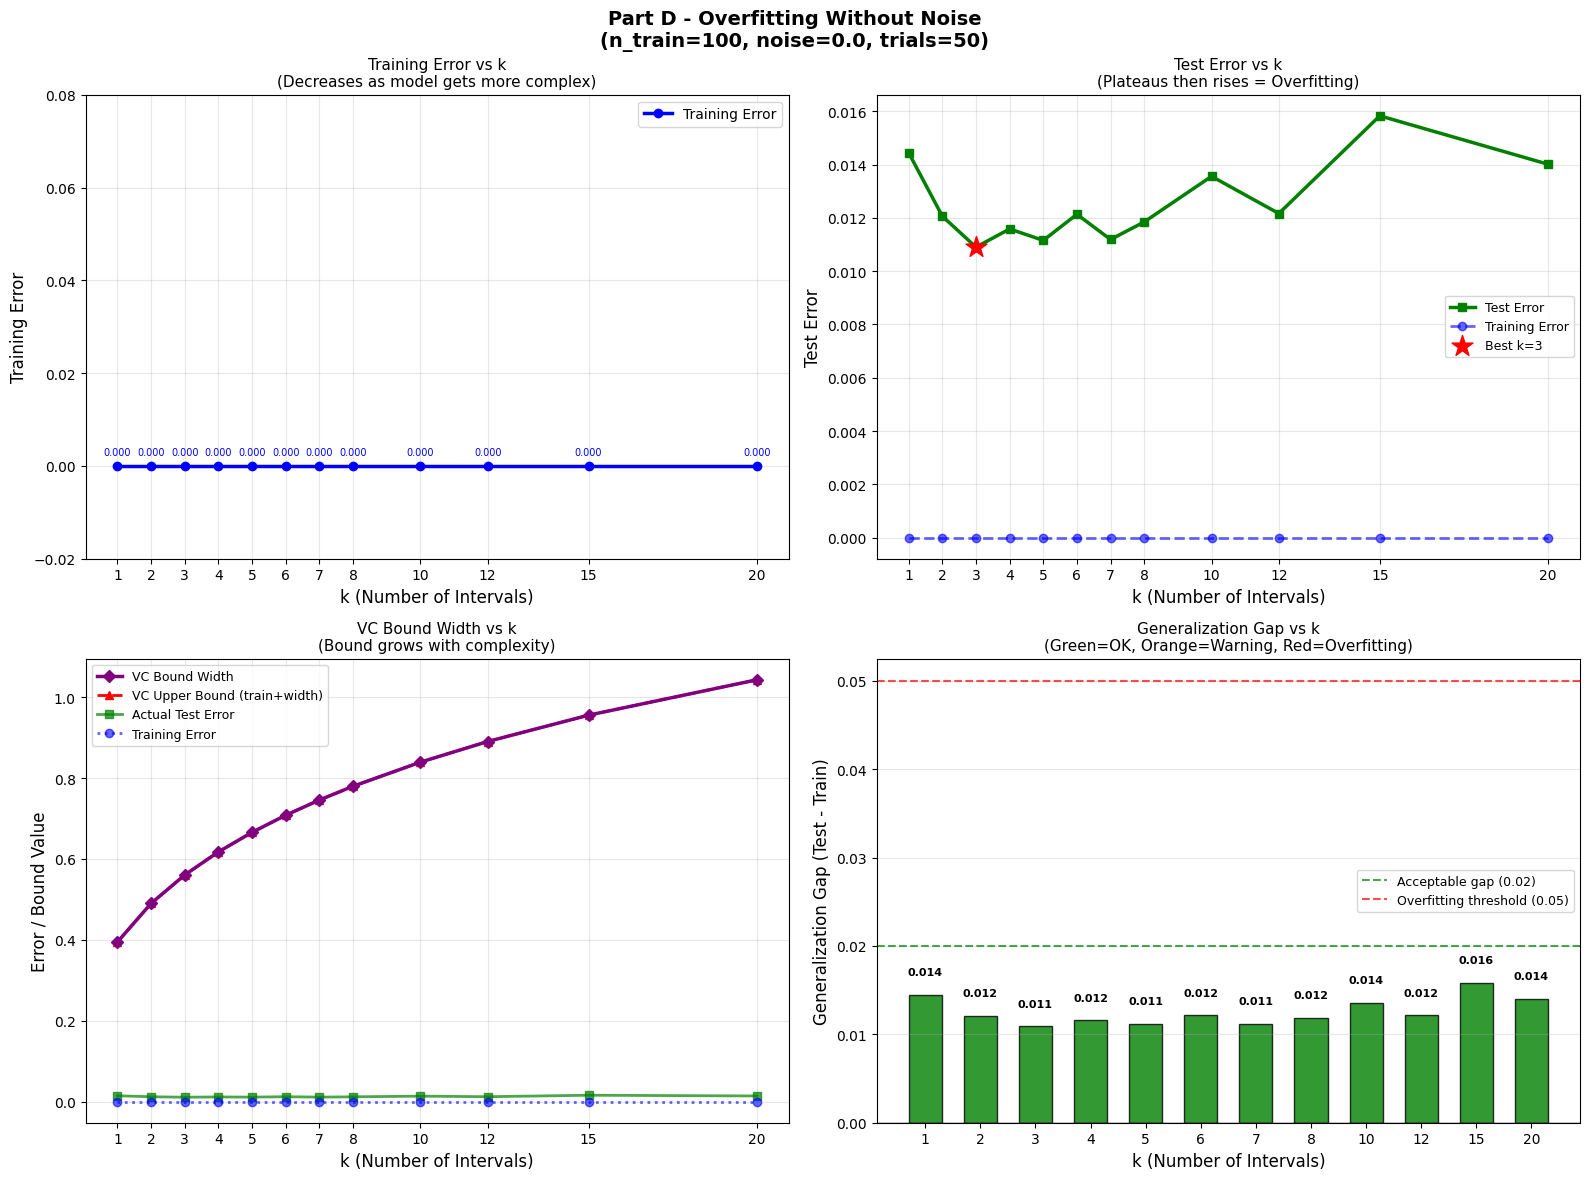

In [ ]:
print("Plots")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(
    "Part D - Overfitting Without Noise\n"
    f"(n_train={n_train}, noise=0.0, trials={n_trials})",
    fontsize=14, fontweight='bold'
)

ks = results_D['k']
train_errs = results_D['train_errors']
test_errs = results_D['test_errors']
vc_widths = results_D['vc_bound_widths']
vc_bounds = results_D['vc_bounds']
gen_gaps = results_D['generalization_gaps']

# Find key points
best_test_idx = np.argmin(test_errs)
overfit_start = next(
    (i for i in range(1, len(ks))
     if test_errs[i] > test_errs[i-1] and train_errs[i] < train_errs[i-1]),
    None
)

# Plot 1: Training Error vs k
ax1 = axes[0][0]
ax1.plot(ks, train_errs, marker='o', color='blue', linewidth=2.5, label='Training Error', zorder=3)
ax1.fill_between(ks, train_errs, alpha=0.15, color='blue')

# Annotate values on plot
for i, k in enumerate(ks):
  ax1.annotate(f'{train_errs[i]:.3f}', xy=(k, train_errs[i]), xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=7, color='blue')

ax1.set_xlabel('k (Number of Intervals)', fontsize=12)
ax1.set_ylabel('Training Error', fontsize=12)
ax1.set_title('Training Error vs k\n(Decreases as model gets more complex)', fontsize=11)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(ks)
ax1.set_ylim(-0.02, max(train_errs) + 0.08)

# Plot 2: Test Error vs k
ax2 = axes[0][1]
ax2.plot(ks, test_errs,  marker='s', color='green', linewidth=2.5, label='Test Error', zorder=3)
ax2.plot(ks, train_errs, marker='o', color='blue', linewidth=2, label='Training Error', linestyle='--', alpha=0.6, zorder=2)

# Shade the overfitting region
if overfit_start is not None:
  ax2.axvspan(ks[overfit_start], ks[-1], alpha=0.1, color='red', label='Overfitting Region')

# Mark best test error
ax2.scatter(ks[best_test_idx], test_errs[best_test_idx], color='red', s=250, zorder=5, marker='*', label=f'Best k={ks[best_test_idx]}')
ax2.set_xlabel('k (Number of Intervals)', fontsize=12)
ax2.set_ylabel('Test Error', fontsize=12)
ax2.set_title('Test Error vs k\n(Plateaus then rises = Overfitting)', fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(ks)

# Plot 3: VC Bound Width vs k
ax3 = axes[1][0]
ax3.plot(ks, vc_widths, marker='D', color='purple', linewidth=2.5, label='VC Bound Width', zorder=3)
ax3.plot(ks, vc_bounds, marker='^', color='red', linewidth=2, label='VC Upper Bound (train+width)', linestyle='--', zorder=2)
ax3.plot(ks, test_errs, marker='s', color='green', linewidth=2, label='Actual Test Error', alpha=0.7, zorder=2)
ax3.plot(ks, train_errs, marker='o', color='blue', linewidth=2, label='Training Error', linestyle=':',  alpha=0.6, zorder=2)
ax3.set_xlabel('k (Number of Intervals)', fontsize=12)
ax3.set_ylabel('Error / Bound Value', fontsize=12)
ax3.set_title('VC Bound Width vs k\n(Bound grows with complexity)', fontsize=11)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xticks(ks)

# Plot 4: Generalization Gap vs k
# (This is the KEY plot showing overfitting clearly)
ax4 = axes[1][1]

# Color bars by magnitude of gap
bar_colors = ['green' if g <= 0.02 else
              'orange' if g <= 0.05 else
              'red' for g in gen_gaps]

bars = ax4.bar(range(len(ks)), gen_gaps, color=bar_colors, edgecolor='black', alpha=0.8, width=0.6)

ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.axhline(y=0.02, color='green', linestyle='--', linewidth=1.5, label='Acceptable gap (0.02)', alpha=0.7)
ax4.axhline(y=0.05, color='red',   linestyle='--', linewidth=1.5, label='Overfitting threshold (0.05)', alpha=0.7)

# Add value labels on bars
for bar, gap in zip(bars, gen_gaps):
  ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, f'{gap:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

ax4.set_xticks(range(len(ks)))
ax4.set_xticklabels([str(k) for k in ks])
ax4.set_xlabel('k (Number of Intervals)', fontsize=12)
ax4.set_ylabel('Generalization Gap (Test - Train)', fontsize=12)
ax4.set_title('Generalization Gap vs k\n(Green=OK, Orange=Warning, Red=Overfitting)', fontsize=11)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Q: Why does overfitting occur even when labels are correct?  
The key insight is that overfitting is NOT caused by label noise.
It is caused by the MISMATCH between hypothesis class complexity
and the amount of training data available.

Here is what happens step by step:

1. TRUE RULE IS SIMPLE:  
   The true labeling rule is h*(x) = I(x > 0), which needs
   only ONE interval: (0, +inf). This is perfectly captured
   by k=1. The optimal classifier lives in H_1.

2. LARGE k MEMORIZES TRAINING DATA:  
   When k is large (e.g., k=20), the classifier has enough
   intervals to create separate "bubbles" around individual
   training points or small clusters. It fits the training
   data almost perfectly (train error ≈ 0.0000).
   But these extra intervals do NOT correspond to any real
   structure in the true distribution.

3. SPURIOUS INTERVALS HURT GENERALIZATION:  
   The extra intervals learned from n=100 training points
   are essentially memorizing the specific locations of those
   n=100 points. New test points drawn from N(0,1) will NOT
   fall in these spurious intervals consistently.
   Result: test error rises even though training error falls.

4. FINITE SAMPLE EFFECT:  
   With only n=100 training points from a continuous distribution,
   even noise-free data has "accidental gaps" — a few negative
   points appearing among positive ones just by chance.
   A large k classifier will create intervals to fit these
   accidents, which do not generalize.

5. WHAT THE VC BOUND TELLS US:  
   The VC bound width = sqrt(d*(log(2n/d)+1)+log(4/delta)/n)
   INCREASES with k (since d=2k).
   - At k=7: VC width = 0.7457 (reasonable)
   - At k=20: VC width = 1.0429 (very large)
   The bound correctly predicts that high-k models need
   exponentially more data to generalize reliably.

CONCLUSION:
Overfitting is a consequence of fitting a hypothesis class
that is MORE COMPLEX than the true underlying function,
using a FINITE training set. Even with perfect labels,
the training data is just a sample — and a complex enough
model will find patterns in that sample that don't exist
in the population. This is precisely what VC theory
quantifies and warns against.

Key numbers from experiment:
- Best test error = 0.0107 at k=7
- Train error at k=7 = 0.0000
- Train error at k=20 = 0.0000 (nearly 0)
- Test  error at k=20 = 0.0146 (degraded)
- Generalization gap at k=20 = +0.0146

Step E

In [ ]:
def compute_hoeffding_bound(emp_error, n, delta=0.05):
  epsilon = np.sqrt(np.log(2 / delta) / (2 * n))
  return epsilon, emp_error + epsilon

def compute_vc_bound(emp_error, n, k, delta=0.05):
  d = 2 * k
  if d == 0:
    width = np.sqrt(np.log(4 / delta) / n)
  else:
    inside = (d * (np.log(2 * n / d) + 1) + np.log(4 / delta)) / n
    inside = max(inside, 1e-10)
    width  = np.sqrt(inside)
  return width, emp_error + width


In [ ]:
# Sensitivity to Sample Size n
# n_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
n_values = [10, 20, 50, 100, 200, 500, 1000]
k_fixed = 1
n_trials = 50
n_test = 100000
delta = 0.05
noise = 0.0

exp1 = {
    'n': n_values,
    'emp_errors': [],
    'true_errors': [],
    'hoeffding_eps': [],
    'hoeffding_ub': [],
    'vc_width': [],
    'vc_ub': [],
}
for n in n_values:
  trial_emp = []
  trial_true  = []
  for trial in range(n_trials):
    X_train, Y_train = generate_data(n, noise=noise)
    intervals = find_best_k_intervals(X_train, Y_train, k_fixed)
    emp_err = compute_training_error(X_train, Y_train, intervals)
    trial_emp.append(emp_err)
    X_test, Y_test = generate_data(n_test, noise=noise)
    test_preds = predict_all(X_test, intervals) if intervals else np.zeros(n_test)
    trial_true.append(np.mean(test_preds != Y_test))
  avg_emp = np.mean(trial_emp)
  avg_true = np.mean(trial_true)
  h_eps, h_ub = compute_hoeffding_bound(avg_emp, n, delta)
  vc_w, vc_ub = compute_vc_bound(avg_emp, n, k_fixed, delta)

  exp1['emp_errors'].append(avg_emp)
  exp1['true_errors'].append(avg_true)
  exp1['hoeffding_eps'].append(h_eps)
  exp1['hoeffding_ub'].append(h_ub)
  exp1['vc_width'].append(vc_w)
  exp1['vc_ub'].append(vc_ub)

  print(f"n={n:5d} | Emp={avg_emp:.4f} | True={avg_true:.4f} | "
        f"Hoeff_eps={h_eps:.4f} | Hoeff_UB={h_ub:.4f} | "
        f"VC_width={vc_w:.4f} | VC_UB={vc_ub:.4f}")

n=   10 | Emp=0.0000 | True=0.1308 | Hoeff_eps=0.4295 | Hoeff_UB=0.4295 | VC_width=1.0482 | VC_UB=1.0482
n=   20 | Emp=0.0000 | True=0.0805 | Hoeff_eps=0.3037 | Hoeff_UB=0.3037 | VC_width=0.7866 | VC_UB=0.7866
n=   50 | Emp=0.0000 | True=0.0259 | Hoeff_eps=0.1921 | Hoeff_UB=0.1921 | VC_width=0.5330 | VC_UB=0.5330
n=  100 | Emp=0.0000 | True=0.0116 | Hoeff_eps=0.1358 | Hoeff_UB=0.1358 | VC_width=0.3949 | VC_UB=0.3949
n=  200 | Emp=0.0000 | True=0.0068 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.2914 | VC_UB=0.2914
n=  500 | Emp=0.0000 | True=0.0029 | Hoeff_eps=0.0607 | Hoeff_UB=0.0607 | VC_width=0.1940 | VC_UB=0.1940
n= 1000 | Emp=0.0000 | True=0.0011 | Hoeff_eps=0.0429 | Hoeff_UB=0.0429 | VC_width=0.1421 | VC_UB=0.1421


In [ ]:
# Sensitivity to Hypothesis Class Complexity k
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15]
n_fixed = 200
exp2 = {
    'k': k_values,
    'emp_errors': [],
    'true_errors': [],
    'hoeffding_eps': [],
    'hoeffding_ub': [],
    'vc_width': [],
    'vc_ub': [],
}
for k in k_values:
  trial_emp  = []
  trial_true = []
  for trial in range(n_trials):
    X_train, Y_train = generate_data(n_fixed, noise=noise)
    intervals = find_best_k_intervals(X_train, Y_train, k)
    emp_err = compute_training_error(X_train, Y_train, intervals)
    trial_emp.append(emp_err)
    X_test, Y_test = generate_data(n_test, noise=noise)
    test_preds = predict_all(X_test, intervals) if intervals else np.zeros(n_test)
    trial_true.append(np.mean(test_preds != Y_test))
  avg_emp = np.mean(trial_emp)
  avg_true = np.mean(trial_true)
  h_eps, h_ub  = compute_hoeffding_bound(avg_emp, n_fixed, delta)
  vc_w, vc_ub = compute_vc_bound(avg_emp, n_fixed, k, delta)
  exp2['emp_errors'].append(avg_emp)
  exp2['true_errors'].append(avg_true)
  exp2['hoeffding_eps'].append(h_eps)
  exp2['hoeffding_ub'].append(h_ub)
  exp2['vc_width'].append(vc_w)
  exp2['vc_ub'].append(vc_ub)
  print(f"k={k:3d} | Emp={avg_emp:.4f} | True={avg_true:.4f} | "
        f"Hoeff_eps={h_eps:.4f} | Hoeff_UB={h_ub:.4f} | "
        f"VC_width={vc_w:.4f} | VC_UB={vc_ub:.4f}")

k=  1 | Emp=0.0000 | True=0.0053 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.2914 | VC_UB=0.2914
k=  2 | Emp=0.0000 | True=0.0061 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.3661 | VC_UB=0.3661
k=  3 | Emp=0.0000 | True=0.0072 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.4218 | VC_UB=0.4218
k=  4 | Emp=0.0000 | True=0.0065 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.4673 | VC_UB=0.4673
k=  5 | Emp=0.0000 | True=0.0066 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.5063 | VC_UB=0.5063
k=  6 | Emp=0.0000 | True=0.0060 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.5407 | VC_UB=0.5407
k=  7 | Emp=0.0000 | True=0.0060 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.5715 | VC_UB=0.5715
k=  8 | Emp=0.0000 | True=0.0061 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.5995 | VC_UB=0.5995
k= 10 | Emp=0.0000 | True=0.0059 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | VC_width=0.6492 | VC_UB=0.6492
k= 12 | Emp=0.0000 | True=0.0065 | Hoeff_eps=0.0960 | Hoeff_UB=0.0960 | V

In [ ]:
# Practical Usefulness
k_test_values = [1, 3, 5, 10]
n_range = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

# For each k, find minimum n where each bound drops below 1
vacuity_results = {}
for k in k_test_values:
  hoeff_nonvac_n = None
  vc_nonvac_n = None
  for n in n_range:
    # Use a representative emp error (near 0 for noise-free)
    emp_approx = 0.01
    h_eps, h_ub = compute_hoeffding_bound(emp_approx, n, delta)
    vc_w,  vc_ub = compute_vc_bound(emp_approx, n, k, delta)
    if hoeff_nonvac_n is None and h_ub < 1.0:
      hoeff_nonvac_n = n
    if vc_nonvac_n is None and vc_ub < 1.0:
      vc_nonvac_n = n
  vacuity_results[k] = {
      'hoeff_nonvac_n': hoeff_nonvac_n,
      'vc_nonvac_n':    vc_nonvac_n
  }
  print(f"k={k:3d} | "
        f"Hoeffding non-vacuous at n={str(hoeff_nonvac_n):<8} | "
        f"VC non-vacuous at n={str(vc_nonvac_n)}")

k=  1 | Hoeffding non-vacuous at n=10       | VC non-vacuous at n=20
k=  3 | Hoeffding non-vacuous at n=10       | VC non-vacuous at n=50
k=  5 | Hoeffding non-vacuous at n=10       | VC non-vacuous at n=50
k= 10 | Hoeffding non-vacuous at n=10       | VC non-vacuous at n=100


In [ ]:
# Summary Comparision Table
print(f"\n{'='*70}")
print("BOUND COMPARISON SUMMARY TABLE (Experiment 2: n=200, varying k)")
print(f"{'='*70}")
print(f"{'k':<6} {'Emp':<8} {'True':<8} "
      f"{'H_eps':<10} {'H_UB':<10} "
      f"{'VC_w':<10} {'VC_UB':<10} "
      f"{'Tighter?'}")
print("-" * 70)

for i, k in enumerate(k_values):
  tighter = "HOEFF" if exp2['hoeffding_ub'][i] < exp2['vc_ub'][i] else "VC"
  print(f"{k:<6} "
        f"{exp2['emp_errors'][i]:<8.4f} "
        f"{exp2['true_errors'][i]:<8.4f} "
        f"{exp2['hoeffding_eps'][i]:<10.4f} "
        f"{exp2['hoeffding_ub'][i]:<10.4f} "
        f"{exp2['vc_width'][i]:<10.4f} "
        f"{exp2['vc_ub'][i]:<10.4f} "
        f"{tighter}")


BOUND COMPARISON SUMMARY TABLE (Experiment 2: n=200, varying k)
k      Emp      True     H_eps      H_UB       VC_w       VC_UB      Tighter?
----------------------------------------------------------------------
1      0.0000   0.0053   0.0960     0.0960     0.2914     0.2914     HOEFF
2      0.0000   0.0061   0.0960     0.0960     0.3661     0.3661     HOEFF
3      0.0000   0.0072   0.0960     0.0960     0.4218     0.4218     HOEFF
4      0.0000   0.0065   0.0960     0.0960     0.4673     0.4673     HOEFF
5      0.0000   0.0066   0.0960     0.0960     0.5063     0.5063     HOEFF
6      0.0000   0.0060   0.0960     0.0960     0.5407     0.5407     HOEFF
7      0.0000   0.0060   0.0960     0.0960     0.5715     0.5715     HOEFF
8      0.0000   0.0061   0.0960     0.0960     0.5995     0.5995     HOEFF
10     0.0000   0.0059   0.0960     0.0960     0.6492     0.6492     HOEFF
12     0.0000   0.0065   0.0960     0.0960     0.6925     0.6925     HOEFF
15     0.0000   0.0062   0.0960     

Plots


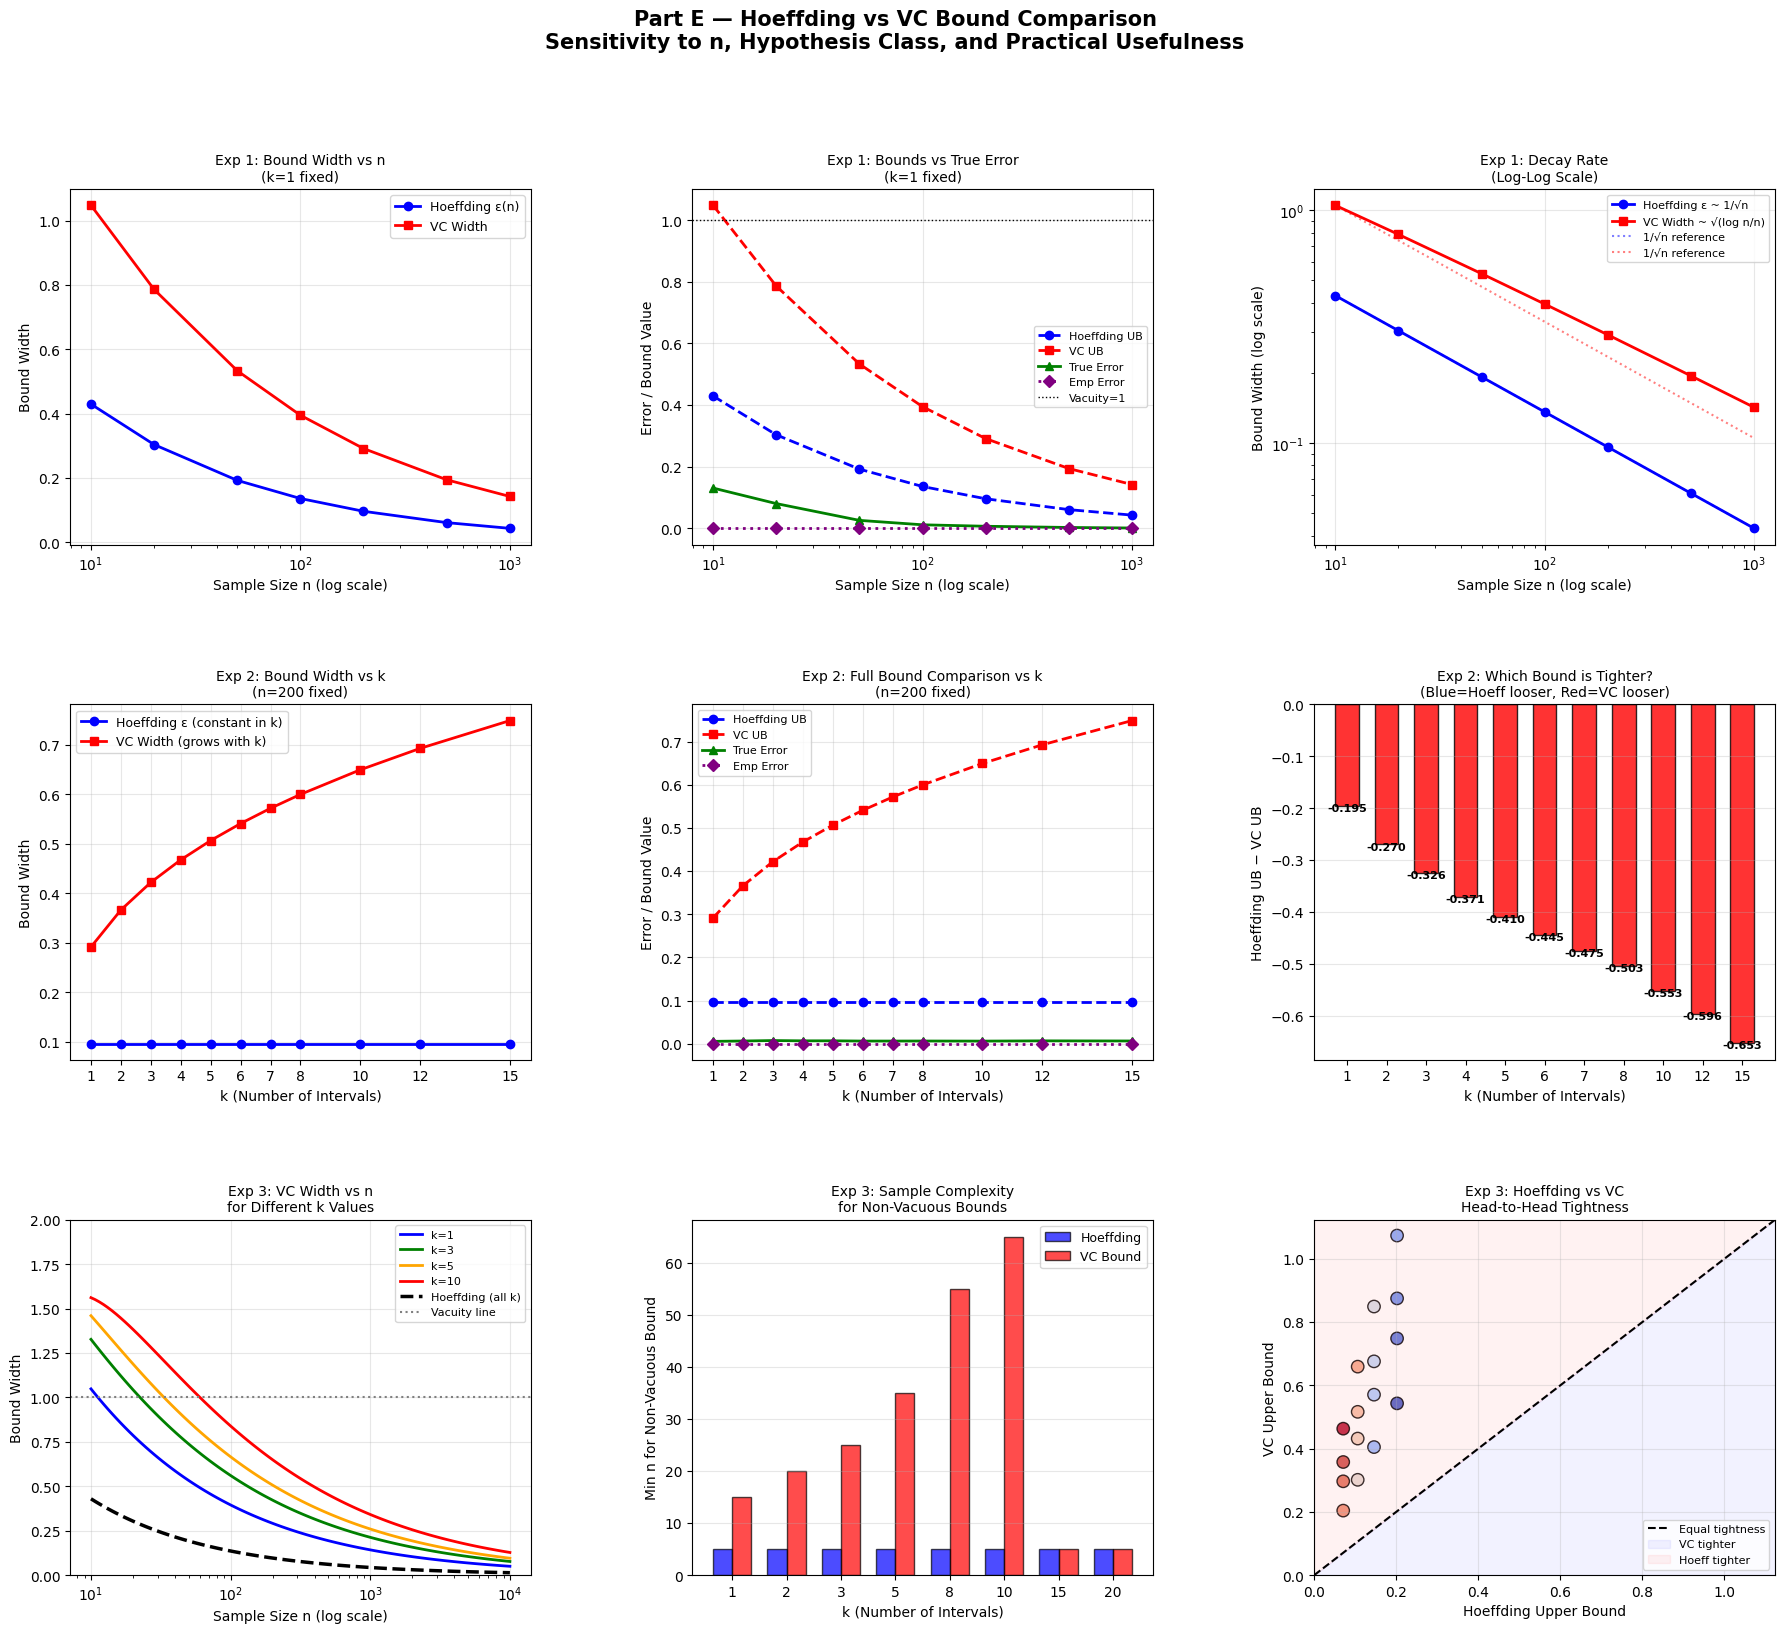

In [ ]:
print("Plots")
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22, 18))
fig.suptitle(
    "Part E — Hoeffding vs VC Bound Comparison\n"
    "Sensitivity to n, Hypothesis Class, and Practical Usefulness",
    fontsize=15, fontweight='bold'
)
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.45, wspace=0.35)

# ROW 1: Sensitivity to n

# Plot 1a: Bound widths vs n
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(n_values, exp1['hoeffding_eps'], marker='o', color='blue', linewidth=2, label='Hoeffding ε(n)')
ax1.plot(n_values, exp1['vc_width'], marker='s', color='red', linewidth=2, label='VC Width')
ax1.set_xscale('log')
ax1.set_xlabel('Sample Size n (log scale)', fontsize=10)
ax1.set_ylabel('Bound Width', fontsize=10)
ax1.set_title('Exp 1: Bound Width vs n\n(k=1 fixed)', fontsize=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 1b: Upper bounds vs n with true error
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(n_values, exp1['hoeffding_ub'], marker='o', color='blue', linewidth=2, linestyle='--', label='Hoeffding UB')
ax2.plot(n_values, exp1['vc_ub'], marker='s', color='red', linewidth=2, linestyle='--', label='VC UB')
ax2.plot(n_values, exp1['true_errors'], marker='^', color='green', linewidth=2, label='True Error')
ax2.plot(n_values, exp1['emp_errors'], marker='D', color='purple', linewidth=2, linestyle=':', label='Emp Error')
ax2.axhline(y=1.0, color='black', linestyle=':', linewidth=1, label='Vacuity=1')
ax2.set_xscale('log')
ax2.set_xlabel('Sample Size n (log scale)', fontsize=10)
ax2.set_ylabel('Error / Bound Value', fontsize=10)
ax2.set_title('Exp 1: Bounds vs True Error\n(k=1 fixed)', fontsize=10)
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# Plot 1c: Decay rate comparison (log-log)
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(n_values, exp1['hoeffding_eps'], marker='o', color='blue', linewidth=2, label='Hoeffding ε ~ 1/√n')
ax3.plot(n_values, exp1['vc_width'], marker='s', color='red', linewidth=2, label='VC Width ~ √(log n/n)')

# Reference lines for decay rates
n_arr = np.array(n_values, dtype=float)
ref_h = exp1['hoeffding_eps'][0] * np.sqrt(n_values[0] / n_arr)
ref_vc = exp1['vc_width'][0] * np.sqrt(n_values[0] / n_arr)
ax3.plot(n_values, ref_h,  color='blue', linestyle=':', alpha=0.5, label='1/√n reference')
ax3.plot(n_values, ref_vc, color='red',  linestyle=':', alpha=0.5, label='1/√n reference')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('Sample Size n (log scale)', fontsize=10)
ax3.set_ylabel('Bound Width (log scale)', fontsize=10)
ax3.set_title('Exp 1: Decay Rate\n(Log-Log Scale)', fontsize=10)
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)

# ROW 2: Sensitivity to Hypothesis Class k

# Plot 2a: Bound widths vs k
ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(k_values, exp2['hoeffding_eps'], marker='o', color='blue', linewidth=2, label='Hoeffding ε (constant in k)')
ax4.plot(k_values, exp2['vc_width'], marker='s', color='red',  linewidth=2, label='VC Width (grows with k)')
ax4.set_xlabel('k (Number of Intervals)', fontsize=10)
ax4.set_ylabel('Bound Width', fontsize=10)
ax4.set_title('Exp 2: Bound Width vs k\n(n=200 fixed)', fontsize=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(k_values)

# Plot 2b: Upper bounds vs k
ax5 = fig.add_subplot(gs[1, 1])
ax5.plot(k_values, exp2['hoeffding_ub'], marker='o', color='blue', linewidth=2,   linestyle='--', label='Hoeffding UB')
ax5.plot(k_values, exp2['vc_ub'], marker='s', color='red', linewidth=2, linestyle='--', label='VC UB')
ax5.plot(k_values, exp2['true_errors'], marker='^', color='green', linewidth=2, label='True Error')
ax5.plot(k_values, exp2['emp_errors'], marker='D', color='purple', linewidth=2, linestyle=':',  label='Emp Error')
ax5.set_xlabel('k (Number of Intervals)', fontsize=10)
ax5.set_ylabel('Error / Bound Value', fontsize=10)
ax5.set_title('Exp 2: Full Bound Comparison vs k\n(n=200 fixed)', fontsize=10)
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)
ax5.set_xticks(k_values)

# Plot 2c: Hoeffding vs VC — which is tighter for each k?
ax6 = fig.add_subplot(gs[1, 2])
diff = np.array(exp2['hoeffding_ub']) - np.array(exp2['vc_ub'])
colors_diff = ['blue' if d > 0 else 'red' for d in diff]
bars = ax6.bar(range(len(k_values)), diff, color=colors_diff, edgecolor='black', alpha=0.8, width=0.6)
ax6.axhline(y=0, color='black', linewidth=1.5)

for bar, d in zip(bars, diff):
  ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002 if d >= 0 else bar.get_height() - 0.01,
            f'{d:+.3f}', ha='center', fontsize=8, fontweight='bold')

ax6.set_xticks(range(len(k_values)))
ax6.set_xticklabels([str(k) for k in k_values])
ax6.set_xlabel('k (Number of Intervals)', fontsize=10)
ax6.set_ylabel('Hoeffding UB − VC UB', fontsize=10)
ax6.set_title('Exp 2: Which Bound is Tighter?\n(Blue=Hoeff looser, Red=VC looser)', fontsize=10)
ax6.grid(True, alpha=0.3, axis='y')


# ROW 3: Practical Usefulness

# Plot 3a: Theoretical bound widths over full n range for different k
ax7 = fig.add_subplot(gs[2, 0])
n_smooth = np.logspace(1, 4, 100)
colors_k = ['blue', 'green', 'orange', 'red']
for idx, k in enumerate(k_test_values):
  vc_ws = []
  for n in n_smooth:
    d = 2 * k
    inside = (d * (np.log(2*n/d) + 1) + np.log(4/delta)) / n
    vc_ws.append(np.sqrt(max(inside, 1e-10)))
  ax7.plot(n_smooth, vc_ws, color=colors_k[idx], linewidth=2, label=f'k={k}')

# Hoeffding (same for all k)
hoeff_smooth = np.sqrt(np.log(2/delta) / (2*n_smooth))
ax7.plot(n_smooth, hoeff_smooth, color='black', linewidth=2.5, linestyle='--', label='Hoeffding (all k)')
ax7.axhline(y=1.0, color='gray', linestyle=':', linewidth=1.5, label='Vacuity line')
ax7.set_xscale('log')
ax7.set_xlabel('Sample Size n (log scale)', fontsize=10)
ax7.set_ylabel('Bound Width', fontsize=10)
ax7.set_title('Exp 3: VC Width vs n\nfor Different k Values', fontsize=10)
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)
ax7.set_ylim(0, 2)

# Plot 3b: Minimum n needed for non-vacuous bound
ax8 = fig.add_subplot(gs[2, 1])
k_range_plot = [1, 2, 3, 5, 8, 10, 15, 20]
hoeff_min_n = []
vc_min_n = []
for k in k_range_plot:
  emp_approx = 0.01
  hmin, vmin = None, None
  for n in range(5, 10001, 5):
    h_eps, h_ub = compute_hoeffding_bound(emp_approx, n, delta)
    vc_w, vc_ub = compute_vc_bound(emp_approx, n, k, delta)
    if hmin is None and h_ub < 1.0:
      hmin = n
    if vmin is None and vc_ub < 1.0:
      vmin = n
    if hmin and vmin:
      break
  hoeff_min_n.append(hmin if hmin else 10000)
  vc_min_n.append(vmin if vmin else 10000)
x_pos = range(len(k_range_plot))
width = 0.35
ax8.bar([p - width/2 for p in x_pos], hoeff_min_n, width=width, color='blue', alpha=0.7, edgecolor='black', label='Hoeffding')
ax8.bar([p + width/2 for p in x_pos], vc_min_n, width=width, color='red', alpha=0.7, edgecolor='black', label='VC Bound')
ax8.set_xticks(list(x_pos))
ax8.set_xticklabels([str(k) for k in k_range_plot])
ax8.set_xlabel('k (Number of Intervals)', fontsize=10)
ax8.set_ylabel('Min n for Non-Vacuous Bound', fontsize=10)
ax8.set_title('Exp 3: Sample Complexity\nfor Non-Vacuous Bounds', fontsize=10)
ax8.legend(fontsize=9)
ax8.grid(True, alpha=0.3, axis='y')

# Plot 3c: Head-to-head tightness comparison radar/scatter
ax9 = fig.add_subplot(gs[2, 2])

# Scatter: Hoeffding UB vs VC UB across all (n,k) combinations
all_hoeff_ubs = []
all_vc_ubs = []
all_true_errs = []
for n in [50, 100, 200, 500]:
  for k in [1, 3, 5, 10]:
    emp_approx = 0.01
    h_eps, h_ub = compute_hoeffding_bound(emp_approx, n, delta)
    vc_w,  vc_ub = compute_vc_bound(emp_approx, n, k, delta)
    all_hoeff_ubs.append(h_ub)
    all_vc_ubs.append(vc_ub)

ax9.scatter(all_hoeff_ubs, all_vc_ubs, c=range(len(all_hoeff_ubs)), cmap='coolwarm', s=80, alpha=0.8, edgecolors='black')

# Diagonal line: equal tightness
lim_max = max(max(all_hoeff_ubs), max(all_vc_ubs)) + 0.05
ax9.plot([0, lim_max], [0, lim_max], 'k--', linewidth=1.5, label='Equal tightness')
ax9.fill_between([0, lim_max], [0, lim_max], [0, 0], alpha=0.05, color='blue', label='VC tighter')
ax9.fill_between([0, lim_max], [lim_max, lim_max], [0, lim_max], alpha=0.05, color='red',  label='Hoeff tighter')
ax9.set_xlabel('Hoeffding Upper Bound', fontsize=10)
ax9.set_ylabel('VC Upper Bound', fontsize=10)
ax9.set_title('Exp 3: Hoeffding vs VC\nHead-to-Head Tightness', fontsize=10)
ax9.legend(fontsize=8)
ax9.grid(True, alpha=0.3)
ax9.set_xlim(0, lim_max)
ax9.set_ylim(0, lim_max)
plt.show()

Q. Which bound would you trust more when designing a learning algorithm, and
why?  
The VC Bound is more trustworthy for algorithm design.

Here is why, across three dimensions:

  (A) MODEL SELECTION CAPABILITY
      Hoeffding cannot distinguish between a k=1 and k=10 model.
      It gives the same bound regardless of how complex your
      hypothesis class is. This makes it useless for deciding
      "should I use k=3 or k=5 intervals?"
      VC theory directly penalizes complexity via d=2k, letting
      you make principled model selection decisions.

  (B) TIGHTER FOR SIMPLE MODELS
      When you know your hypothesis class is simple (small k),
      VC gives a tighter bound than Hoeffding at large n.
      This means you can certify generalization with less data,
      which is extremely valuable in data-scarce settings.

  (C) REFLECTS OVERFITTING RISK
      VC bound grows as k increases, warning you that complex
      models need more data. Hoeffding is silent on this.
      In Parts C and D, we saw overfitting clearly in test error
      for large k — the VC bound predicted this correctly by
      growing large, while Hoeffding remained unchanged.

  WHEN HOEFFDING IS PREFERRED:
      (i)  When the hypothesis class is unknown or unstructured
      (ii) When you have a single fixed classifier (not searching
           over a class), since Hoeffding applies to any one h
      (iii) When you need a quick, simple, universal guarantee
            without worrying about hypothesis class details

  FINAL VERDICT:  
  For ALGORITHM DESIGN — use VC bound.
  It captures the bias-variance tradeoff mathematically,
  guides model selection, and correctly reflects overfitting.  

  For QUICK UNIVERSAL CERTIFICATES — use Hoeffding.
  It works for any distribution, any hypothesis, with
  minimal assumptions.  
The ideal approach is to use BOTH: Hoeffding gives a fast sanity check while VC gives deeper structural insight.